#### Cleaning the Dataset and Filtering out Significant Genes

In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df = df.rename(columns={'Unnamed: 0': 'Gene'})

In [4]:
df.dropna(inplace=True)

In [5]:
df.sort_values(by='padj', ascending=True, inplace=True) # I set Ascending to 'True' because I want the most likely to be significantly expressed genes to be at the top. They have the smallest p-adj and p-values

In [6]:
df.head()

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
8787,ENSG00000146918,10299.360858,-3.083064,0.073089,-42.182066,0.0,0.0
9347,ENSG00000151892,3060.072396,-7.472726,0.172893,-43.221612,0.0,0.0
1760,ENSG00000088325,9674.373626,-2.671548,0.069035,-38.698433,0.0,0.0
11696,ENSG00000166508,19002.865645,-3.154208,0.073329,-43.014698,0.0,0.0
8588,ENSG00000145386,2919.382249,-3.568913,0.081657,-43.706241,0.0,0.0


In [7]:
df['-log10pvalue'] = -np.log10(df.pvalue)
df['-log10padj'] = -np.log10(df.padj)

C:\Users\tobij\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tobij\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
# sgs stands for significant genes, i.e the genes that were differentially expressed
# alpha is the significance value/threshold 
alpha = 0.05
sgs_mask = df['-log10padj'] > -np.log10(alpha)

In [9]:
# I used the adjusted p-values (padj) to filter out the significant genes
sgs = df[sgs_mask].Gene
sgs.head()

8787     ENSG00000146918
9347     ENSG00000151892
1760     ENSG00000088325
11696    ENSG00000166508
8588     ENSG00000145386
Name: Gene, dtype: object

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Fold Change Analysis

In [11]:
# Looking for genes where the expression is double or greater.
# gdge stands for genes with doubled or greater expression
gdge = df[df.log2FoldChange >= 1].Gene

In [12]:
# Filtering out genes where the expression is half or lesser.
# ghle stands for genes with halved or lesser expression
ghle = df[df.log2FoldChange <= -1].Gene

#### Volcano Plot - '-log10padj vs log2FoldChange'

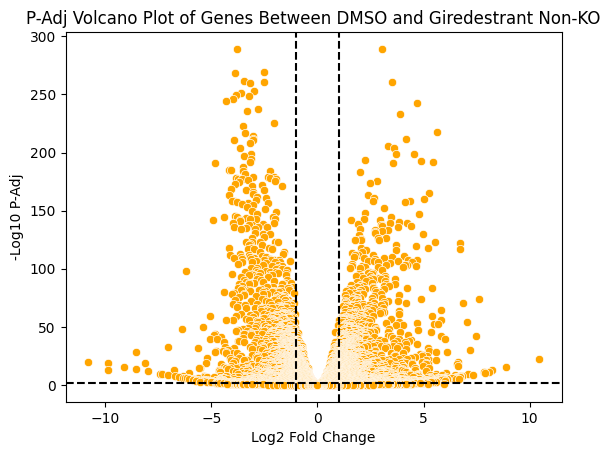

In [13]:
# To see the genes that are both statistically significant and that meaningful expression (either +ve or -ve)
sns.scatterplot(data = df, x='log2FoldChange', y='-log10padj', color='orange')
plt.title('P-Adj Volcano Plot of Genes Between DMSO and Giredestrant Non-KO')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black') # All the genes above the horizontal line are significant and differentially expressed
plt.axvline(1, linestyle='--', color='black') # To see the genes whose expression was double or greater (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # To see the genes whose expression was half or lesser  (log2foldchange <= -1)
plt.show()

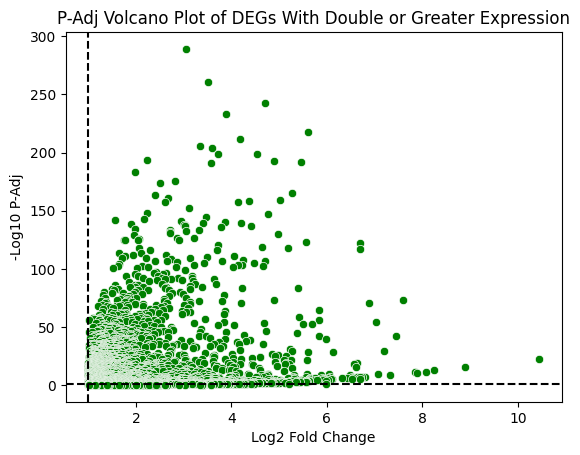

In [14]:
# To see the genes whose expression was double or greater 
sns.scatterplot(data = df[df.Gene.isin(gdge)], x='log2FoldChange', y='-log10padj', color='green')
plt.title('P-Adj Volcano Plot of DEGs With Double or Greater Expression')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black')
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.show()

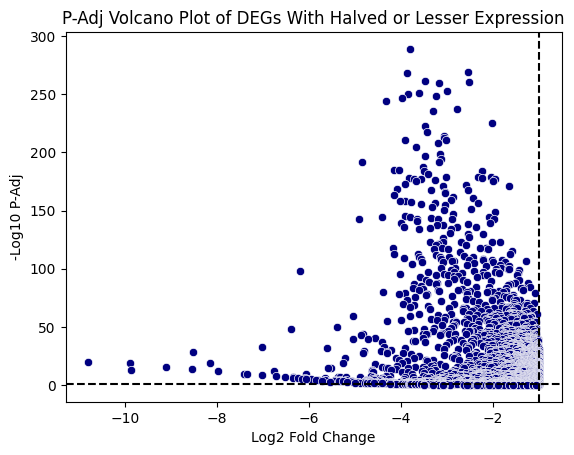

In [15]:
# To see the genes whose expression was half or lesser
sns.scatterplot(data = df[df.Gene.isin(ghle)], x='log2FoldChange', y='-log10padj', color='navy')
plt.title('P-Adj Volcano Plot of DEGs With Halved or Lesser Expression')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black')
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

#### 'Base Mean vs log2FoldChange'

In [16]:
df['log10basemean'] = np.log10(df.baseMean) # To scale the values down so they can be more interpretable

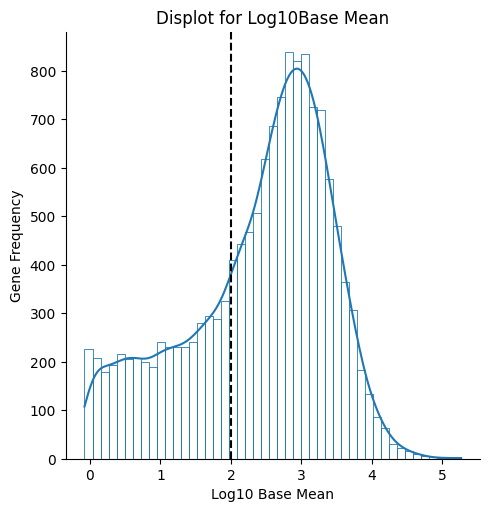

In [17]:
sns.displot(df.log10basemean, kde=True, fill=False)
plt.title('Displot for Log10Base Mean')
plt.xlabel('Log10 Base Mean')
plt.ylabel('Gene Frequency')
plt.axvline(2, linestyle='--', color='black') # The line is the threshold I picked
plt.show()

In [18]:
# Selecting the basemean threshold
basemean_thresh = 2

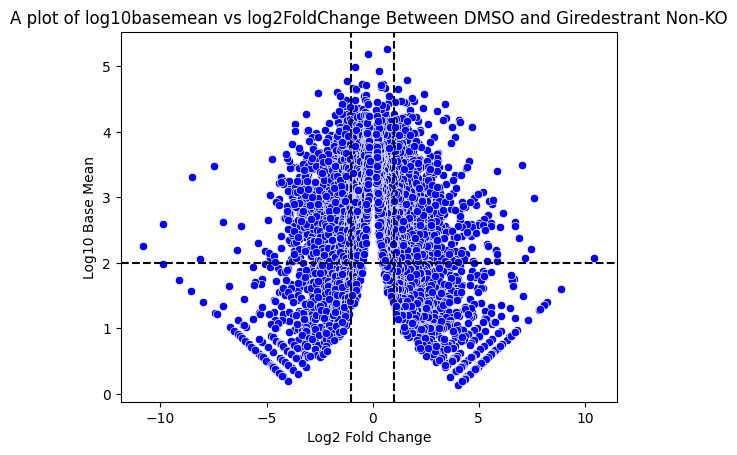

In [19]:
sns.scatterplot(data=df[sgs_mask], x='log2FoldChange', y='log10basemean', color='blue') # The data is for only the significant genes
plt.title('A plot of log10basemean vs log2FoldChange Between DMSO and Giredestrant Non-KO')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Log10 Base Mean')
plt.axhline(basemean_thresh, linestyle='--', color='black') # The genes above the vertical line have avg counts higher than the threshold (across all samples)
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

#### 'lfcSE vs log2FoldChange'

In [20]:
df.lfcSE.describe()

count    14284.000000
mean         0.372234
std          0.515416
min          0.056951
25%          0.110466
50%          0.152456
75%          0.340573
max          3.396850
Name: lfcSE, dtype: float64

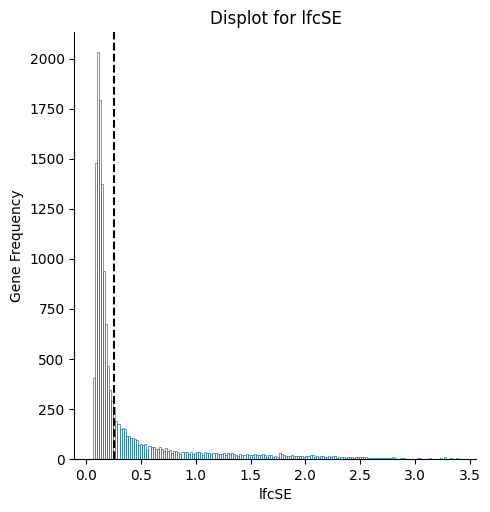

In [21]:
sns.displot(df.lfcSE, fill=False)
plt.title('Displot for lfcSE')
plt.ylabel('Gene Frequency')
plt.axvline(0.25, linestyle='--', color='black') # The line is the threshold I picked
plt.show()

In [22]:
lfcSE_thresh = 0.25

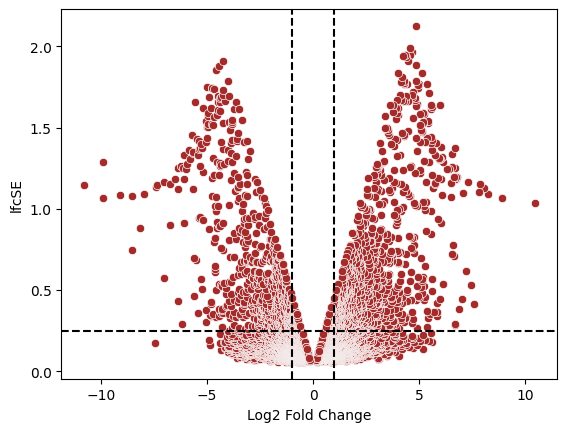

In [23]:
sns.scatterplot(data=df[sgs_mask], x='log2FoldChange', y='lfcSE', color='brown')
plt.xlabel('Log2 Fold Change')
plt.axhline(lfcSE_thresh, linestyle='--', color='black') # The genes below the horizontal line have low variability, i.e the standard error for each of them is low
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

In [24]:
# To find genes that have high log2FoldChange and low lfcSE
# lvlfc stands for low variablity, large fold change
# The fold change can be positive or negative, as long as it is substantial
lvlfc = df[(df.lfcSE <= 0.25) & ((df.log2FoldChange >= 1) | (df.log2FoldChange <= -1))]
lvlfc.Gene

8787     ENSG00000146918
9347     ENSG00000151892
1760     ENSG00000088325
11696    ENSG00000166508
8588     ENSG00000145386
              ...       
7891     ENSG00000140545
15289    ENSG00000185261
8644     ENSG00000145819
18210    ENSG00000221909
13468    ENSG00000174721
Name: Gene, Length: 2514, dtype: object

In [25]:
# degwgcie stands for 'Differentially expressed genes with great changes in expression (The changes in expression refer to log2foldchange <= -1 and log2foldchange >= 1)'
degwgcie_df = df[(df.padj < alpha) & ((df.log2FoldChange <= -1) | (df.log2FoldChange >= 1))]

In [26]:
degwgcie_df.head()

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10pvalue,-log10padj,log10basemean
8787,ENSG00000146918,10299.360858,-3.083064,0.073089,-42.182066,0.0,0.0,inf,inf,4.012810
9347,ENSG00000151892,3060.072396,-7.472726,0.172893,-43.221612,0.0,0.0,inf,inf,3.485732
1760,ENSG00000088325,9674.373626,-2.671548,0.069035,-38.698433,0.0,0.0,inf,inf,3.985623
11696,ENSG00000166508,19002.865645,-3.154208,0.073329,-43.014698,0.0,0.0,inf,inf,4.278819
8588,ENSG00000145386,2919.382249,-3.568913,0.081657,-43.706241,0.0,0.0,inf,inf,3.465291


In [27]:
standard_data = pd.read_csv('standard.csv')

In [28]:
# The degwgcie_count_df is for all the counts of the differentially expressed genes with great changes in expression
# To make the order of genes in the new degwgcie_count_df the same as degwgcie_df
degwgcie_count_df = standard_data[standard_data.name.isin(degwgcie_df.Gene)]
degwgcie_count_df = degwgcie_count_df.set_index('name').loc[degwgcie_df.Gene] # Basically getting (in order) the names of the genes of the smaller degwgcie_df in the larger degwgcie_count_df and arranging the degwgcie_count_df with them

In [29]:
degwgcie_count_df # The indices may have changed, but the genes are in the correct order, arranged from the one with the lowest p-adj to the one with the highest in this dataframe

,dmso_control_1,dmso_control_2,dmso_control_3,dmso_control_4,giredestrant_control_1,giredestrant_control_2,giredestrant_control_3,giredestrant_control_4
name,,,,,,,,
ENSG00000146918,15668,21108,25583,19544,1794,2076,2125,2068
ENSG00000151892,6273,6649,7332,6331,22,21,41,44
ENSG00000088325,14716,19534,20951,18637,2191,2270,2510,2789
ENSG00000166508,28386,39677,44876,38684,3251,3617,3784,3569
ENSG00000145386,4393,6148,7370,6055,367,421,453,445
...,...,...,...,...,...,...,...,...
ENSG00000156500,18,10,15,13,6,5,3,4
ENSG00000107551,0,3,1,4,1,9,13,9
ENSG00000105519,4,19,27,16,24,14,46,30


In [30]:
# Normalizing all the counts with log2(x + 1) to stabilise the variance and make interpretation of the upcoming heatmap easy
normalized = degwgcie_count_df.apply(lambda x: np.log2(x + 1))

In [31]:
normalized.head()

,dmso_control_1,dmso_control_2,dmso_control_3,dmso_control_4,giredestrant_control_1,giredestrant_control_2,giredestrant_control_3,giredestrant_control_4
name,,,,,,,,
ENSG00000146918,13.935625,14.365571,14.642954,14.254512,10.809768,11.020286,11.053926,11.014718
ENSG00000151892,12.615170,12.699139,12.840188,12.628446,4.523562,4.459432,5.392317,5.491853
ENSG00000088325,13.845196,14.253774,14.354800,14.185959,11.098032,11.149112,11.294046,11.446049
ENSG00000166508,14.792943,15.276052,15.453689,15.239487,11.667112,11.820977,11.886078,11.801708
ENSG00000145386,12.101319,12.586136,12.847645,12.564149,8.523562,8.721099,8.826548,8.800900


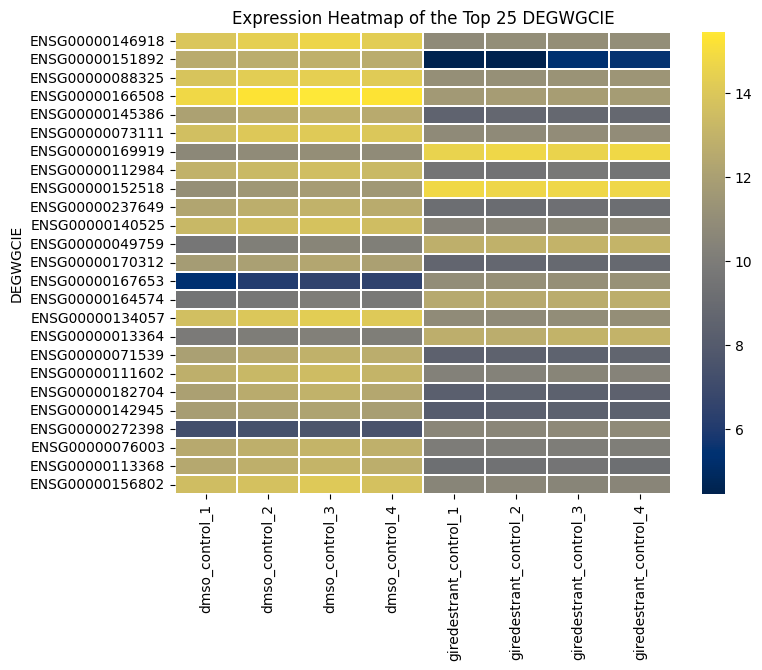

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(normalized.iloc[:25], annot=False, cmap='cividis', linewidths=.01) # To visualise expression in the topmost 25 degwgcie in the dataframe
plt.title('Expression Heatmap of the Top 25 DEGWGCIE')
plt.ylabel('DEGWGCIE')
plt.show()

degwgcie_count_df.to_csv('degwgcie_count_df.csv')

In [33]:
# To see the records of DEGs with only double or greater expression changes
degwdge_df = degwgcie_df[degwgcie_df.log2FoldChange >= 1]

degwdge_df.to_csv('double_or_greater_expression.csv', index=False)

In [34]:
'ENSG00000167468' in degwdge_df.Gene.values.tolist()

False

In [35]:
'ENSG00000167468' in degwgcie_df.Gene.values.tolist()

False

In [36]:
'ENSG00000167468' in df.Gene.values.tolist()

True

In [37]:
df[df.Gene == 'ENSG00000167468']

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10pvalue,-log10padj,log10basemean
11904,ENSG00000167468,9721.190885,-0.36607,0.087384,-4.189195,0.000028,0.000067,4.552925,4.174777,3.987719


- Here, the GPX4 gene (ENSG00000167468) is differentially expressed (because its pvalue < 0.05). However, the change in the expression is negative (i.e expression dropped upon treatment with Giredestrant) but not up to half of its expression in dmso.

#### Functional Annotation Chart Gene Report for DEGWDGE associated with breast cancer (identified with the DAVID tool)

In [38]:
degwdge_df.shape

(2139, 10)

In [39]:
import glob
import os

In [40]:
os.getcwd()

'C:\\Users\\tobij\\Desktop\\Ipynb Tasks\\Giredestrant\\Standard Folder'

In [41]:
paths = glob.glob('C:\\Users\\tobij\\Desktop\\Ipynb Tasks\\Giredestrant\\Standard Folder\\degwdge_sets/*.txt')

In [42]:
paths

['C:\\Users\\tobij\\Desktop\\Ipynb Tasks\\Giredestrant\\Standard Folder\\degwdge_sets\\breast_cancer_degwdge_set_1.txt',
 'C:\\Users\\tobij\\Desktop\\Ipynb Tasks\\Giredestrant\\Standard Folder\\degwdge_sets\\breast_cancer_degwdge_set_2.txt']

In [43]:
dg_dfs = []
for path in paths[:2]:
    dg_df = pd.read_csv(path, delimiter='\t').reset_index().rename(columns={'index': 'Gene', 'ID': 'Name'}).drop(['Gene Name', 'Species'], axis=1)
    dg_dfs.append(dg_df)

In [44]:
dg_df = pd.concat(dg_dfs, axis=0)

In [45]:
dg_df.duplicated().sum()

0

In [46]:
dg_df = dg_df.reset_index().drop('index', axis=1)

In [47]:
dg_df.head()

,Gene,Name
0,ENSG00000030110,BCL2 antagonist/killer 1(BAK1)
1,ENSG00000165879,FRAT regulator of WNT signaling pathway 1(FRAT1)
2,ENSG00000177606,"Jun proto-oncogene, AP-1 transcription factor ..."
3,ENSG00000129946,SHC adaptor protein 2(SHC2)
4,ENSG00000100485,SOS Ras/Rho guanine nucleotide exchange factor...


#### Functional Annotation Chart Gene Report for DEGWHLE associated with breast cancer (identified with the DAVID tool)

In [48]:
degwhle_df = degwgcie_df[degwgcie_df.log2FoldChange <= -1]

In [49]:
# degwhle_df.to_csv('half_or_lower_expression.csv', index=False)

In [50]:
degwhle_df.shape

(2015, 10)

In [51]:
paths = glob.glob('C:\\Users\\tobij\\Desktop\\Ipynb Tasks\\Giredestrant\\Standard Folder\\degwhle_sets/*.txt')

In [52]:
hl_dfs = []
for path in paths:
    hl_df = pd.read_csv(path, delimiter='\t').reset_index().rename(columns={'index': 'Gene', 'ID': 'Name'}).drop(['Gene Name', 'Species'], axis=1)
    hl_dfs.append(hl_df)

In [53]:
hl_df = pd.concat(hl_dfs, axis=0)

In [54]:
hl_df.shape

(276, 2)

In [55]:
hl_df.duplicated().sum()

99

In [56]:
hl_df.drop_duplicates(keep='first', inplace=True)

In [57]:
# These are the genes whose expression halved or got even lower when treatment with the giredestrant occured that are also implicated in breast cancer
hl_df

,Gene,Name
0,ENSG00000171791,BCL2 apoptosis regulator(BCL2)
1,ENSG00000197299,BLM RecQ like helicase(BLM)
2,ENSG00000012048,BRCA1 DNA repair associated(BRCA1)
3,ENSG00000138376,BRCA1 associated RING domain 1(BARD1)
4,ENSG00000136492,BRCA1 interacting helicase 1(BRIP1)
...,...,...
91,ENSG00000130775,thymocyte selection associated family member 2...
94,ENSG00000162607,ubiquitin specific peptidase 1(USP1)
96,ENSG00000174442,zwilch kinetochore protein(ZWILCH)
2,ENSG00000007968,E2F transcription factor 2(E2F2)


#### Data Prep For GSEA

In [58]:
results = pd.read_csv('results.csv').dropna().rename(columns={'Unnamed: 0': 'gene'})

In [59]:
# Some genes have padjs of 0. So I am adjusting the values with the use of a constant
epsilon = 1e-300

In [60]:
results['modded_padj'] = results.padj + epsilon

In [61]:
results['-log10moddedpadj'] = -np.log10(results.modded_padj)

In [62]:
results

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,modded_padj,-log10moddedpadj
0,ENSG00000000003,1061.025662,0.332171,0.104432,3.180752,1.468936e-03,2.865648e-03,2.865648e-03,2.542777
2,ENSG00000000419,1548.693932,-0.094699,0.104703,-0.904455,3.657542e-01,4.401746e-01,4.401746e-01,0.356375
3,ENSG00000000457,579.833734,0.395862,0.126154,3.137916,1.701536e-03,3.289313e-03,3.289313e-03,2.482895
4,ENSG00000000460,660.633060,-1.479914,0.095148,-15.553851,1.498205e-54,3.237573e-53,3.237573e-53,52.489780
7,ENSG00000001036,3909.991813,-0.582428,0.093247,-6.246057,4.209445e-10,1.520296e-09,1.520296e-09,8.818072
...,...,...,...,...,...,...,...,...,...
20284,ENSG00000284484,1.287991,3.091330,1.959319,1.577758,1.146213e-01,1.595139e-01,1.595139e-01,0.797202
20285,ENSG00000284491,1.469648,-3.874574,2.061541,-1.879455,6.018233e-02,8.958362e-02,8.958362e-02,1.047771
20287,ENSG00000284512,1.873885,1.449908,1.640330,0.883912,3.767437e-01,4.508929e-01,4.508929e-01,0.345927
20304,ENSG00000284681,2.644786,-4.738741,1.517227,-3.123290,1.788415e-03,3.445607e-03,3.445607e-03,2.462734


In [63]:
# Getting the ranking metric for each gene
results['ranking_metric'] = results['-log10moddedpadj'] * results.log2FoldChange

In [64]:
# Sorting ti see the rank. The positive values indicate positive change in expression and the negative values indicate otherwise. The genes at the top and bottom are significant.
results = results.sort_values(by='ranking_metric', ascending=False)

In [65]:
ranked_genes = results[['gene', 'ranking_metric']]

##### Converting Ensembl IDs to Gene Symbols

In [66]:
# GSEA requires gene symbols so the conversion from ensemble ids to gene symbols is important

In [67]:
# !pip install gprofiler-official

In [68]:
# !python.exe -m pip install --upgrade pip

In [69]:
from gprofiler import GProfiler

In [70]:
gp = GProfiler(return_dataframe=True)

In [71]:
ids = ranked_genes.gene.tolist()

In [72]:
gp_results = gp.convert(organism='hsapiens', query=ids)
gp_results.head()

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,ENSG00000167653,ENSG00000167653,1,1,PSCA,prostate stem cell antigen [Source:HGNC Symbol...,"ARRAYEXPRESS,ENSG",query_1
1,ENSG00000137393,ENSG00000137393,2,1,RNF144B,ring finger protein 144B [Source:HGNC Symbol;A...,"ARRAYEXPRESS,ENSG",query_1
2,ENSG00000169919,ENSG00000169919,3,1,GUSB,glucuronidase beta [Source:HGNC Symbol;Acc:HGN...,"ARRAYEXPRESS,ENSG",query_1
3,ENSG00000064787,ENSG00000064787,4,1,BCAS1,brain enriched myelin associated protein 1 [So...,"ARRAYEXPRESS,ENSG",query_1
4,ENSG00000134258,ENSG00000134258,5,1,VTCN1,V-set domain containing T cell activation inhi...,"ARRAYEXPRESS,ENSG",query_1


In [73]:
ranking_metrics = ranked_genes.ranking_metric

In [74]:
gene_symbols = gp_results.name

In [75]:
# The indices of ranking_metrics have to be the same as the indices of gene_symbols for a concatenation to occur
ranking_metrics = ranking_metrics.reset_index().drop('index', axis=1)

In [76]:
ranked_genes_with_gene_symbols = pd.concat([gene_symbols, ranking_metrics], axis=1)

In [77]:
ranked_genes_with_gene_symbols.isna().sum()

name              0
ranking_metric    0
dtype: int64

In [78]:
# The data should ba saved in the .rnk format, delimited by tabs and without headers
# ranked_genes_with_gene_symbols.to_csv('ranked_genes.rnk', sep='\t', header=False, index=False)

#### GSEA Results from WebGestalt

##### With the OMIM database:

In [80]:
from PIL import Image

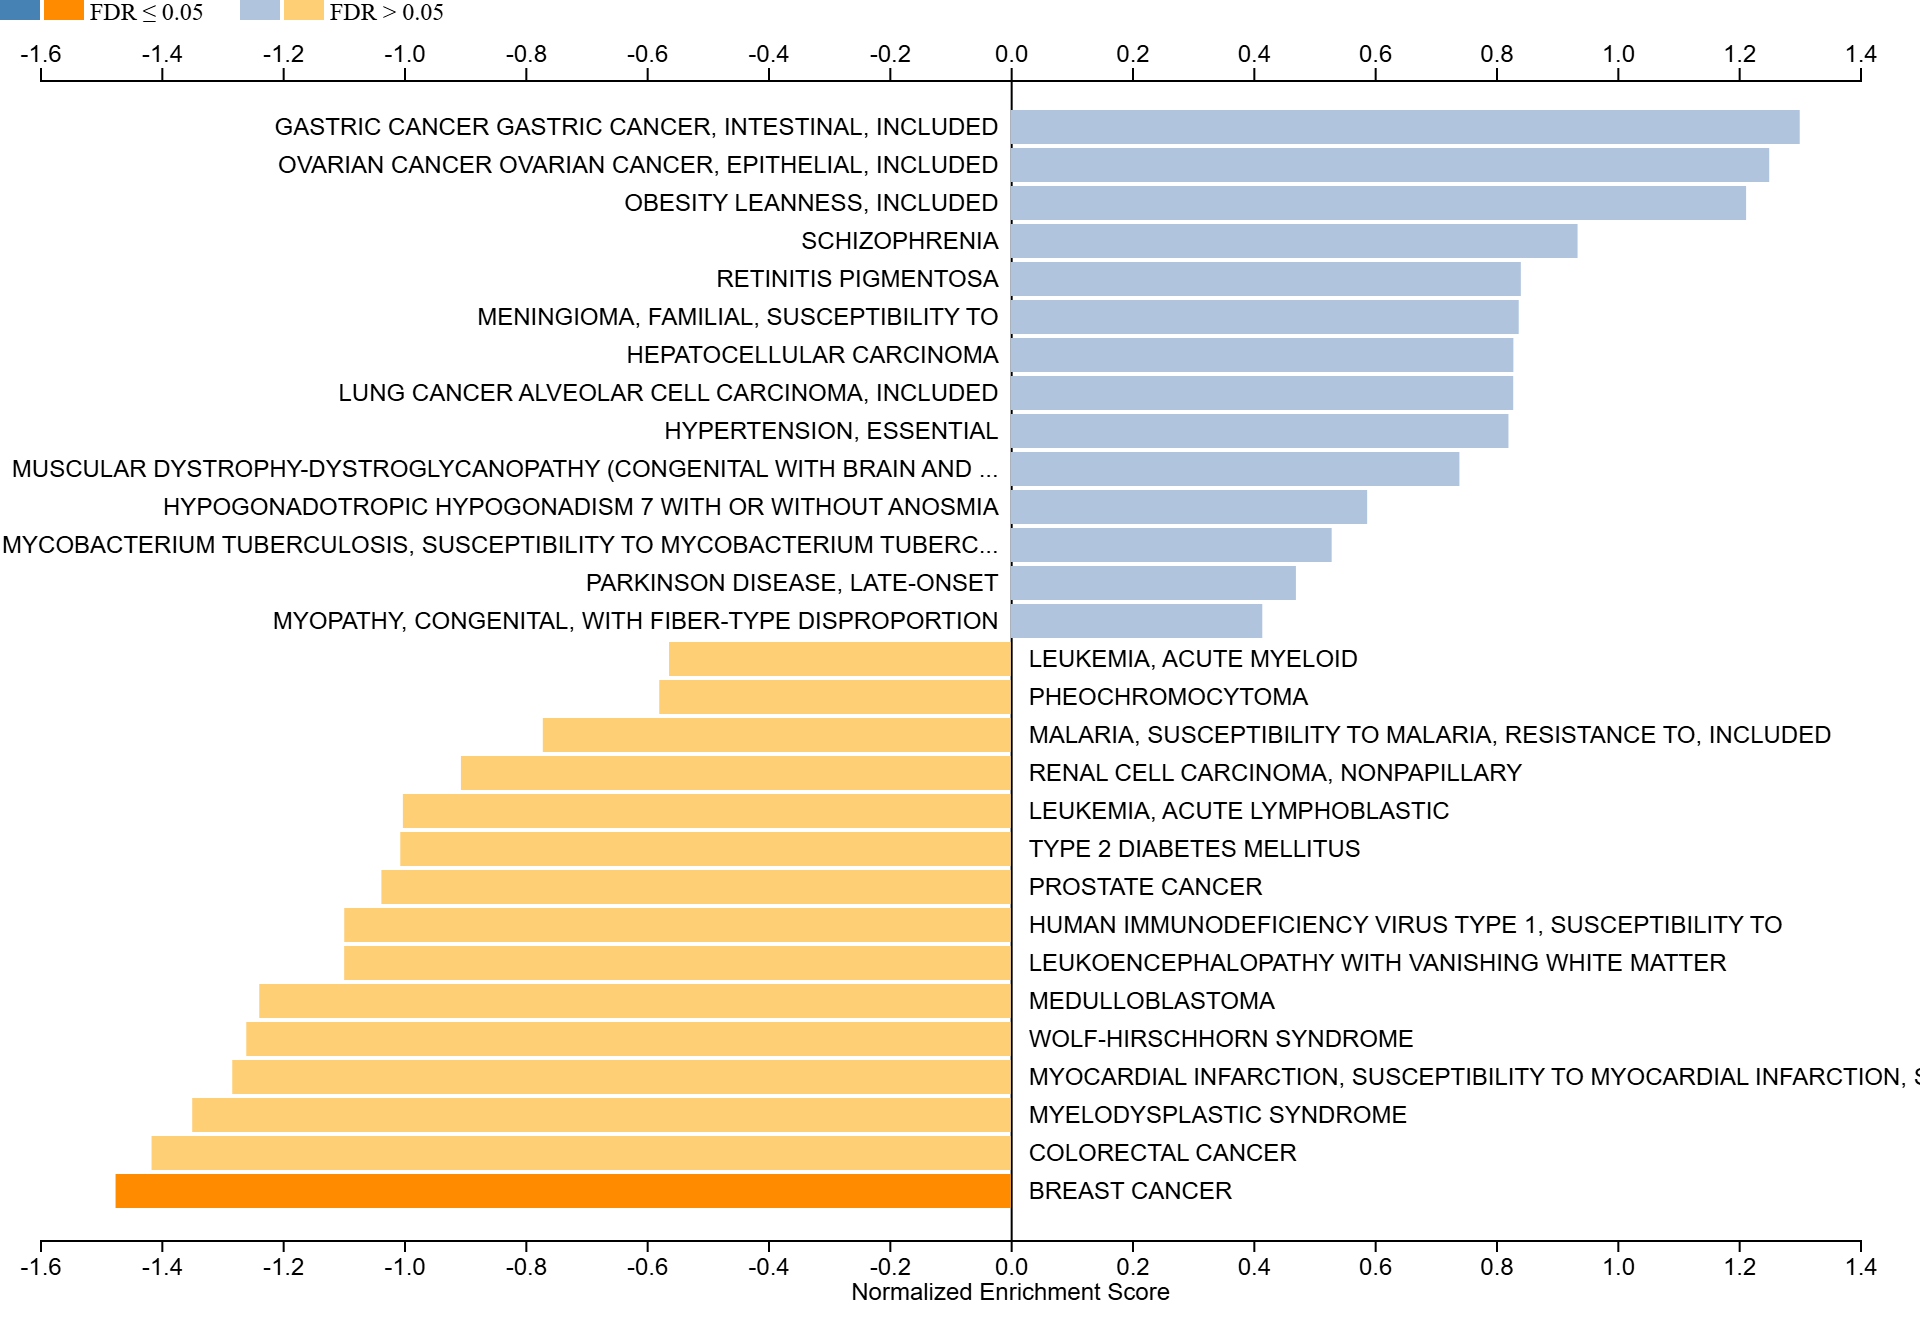

In [86]:
Image.open(r'C:\Users\tobij\Downloads\wg_bar (1).png')

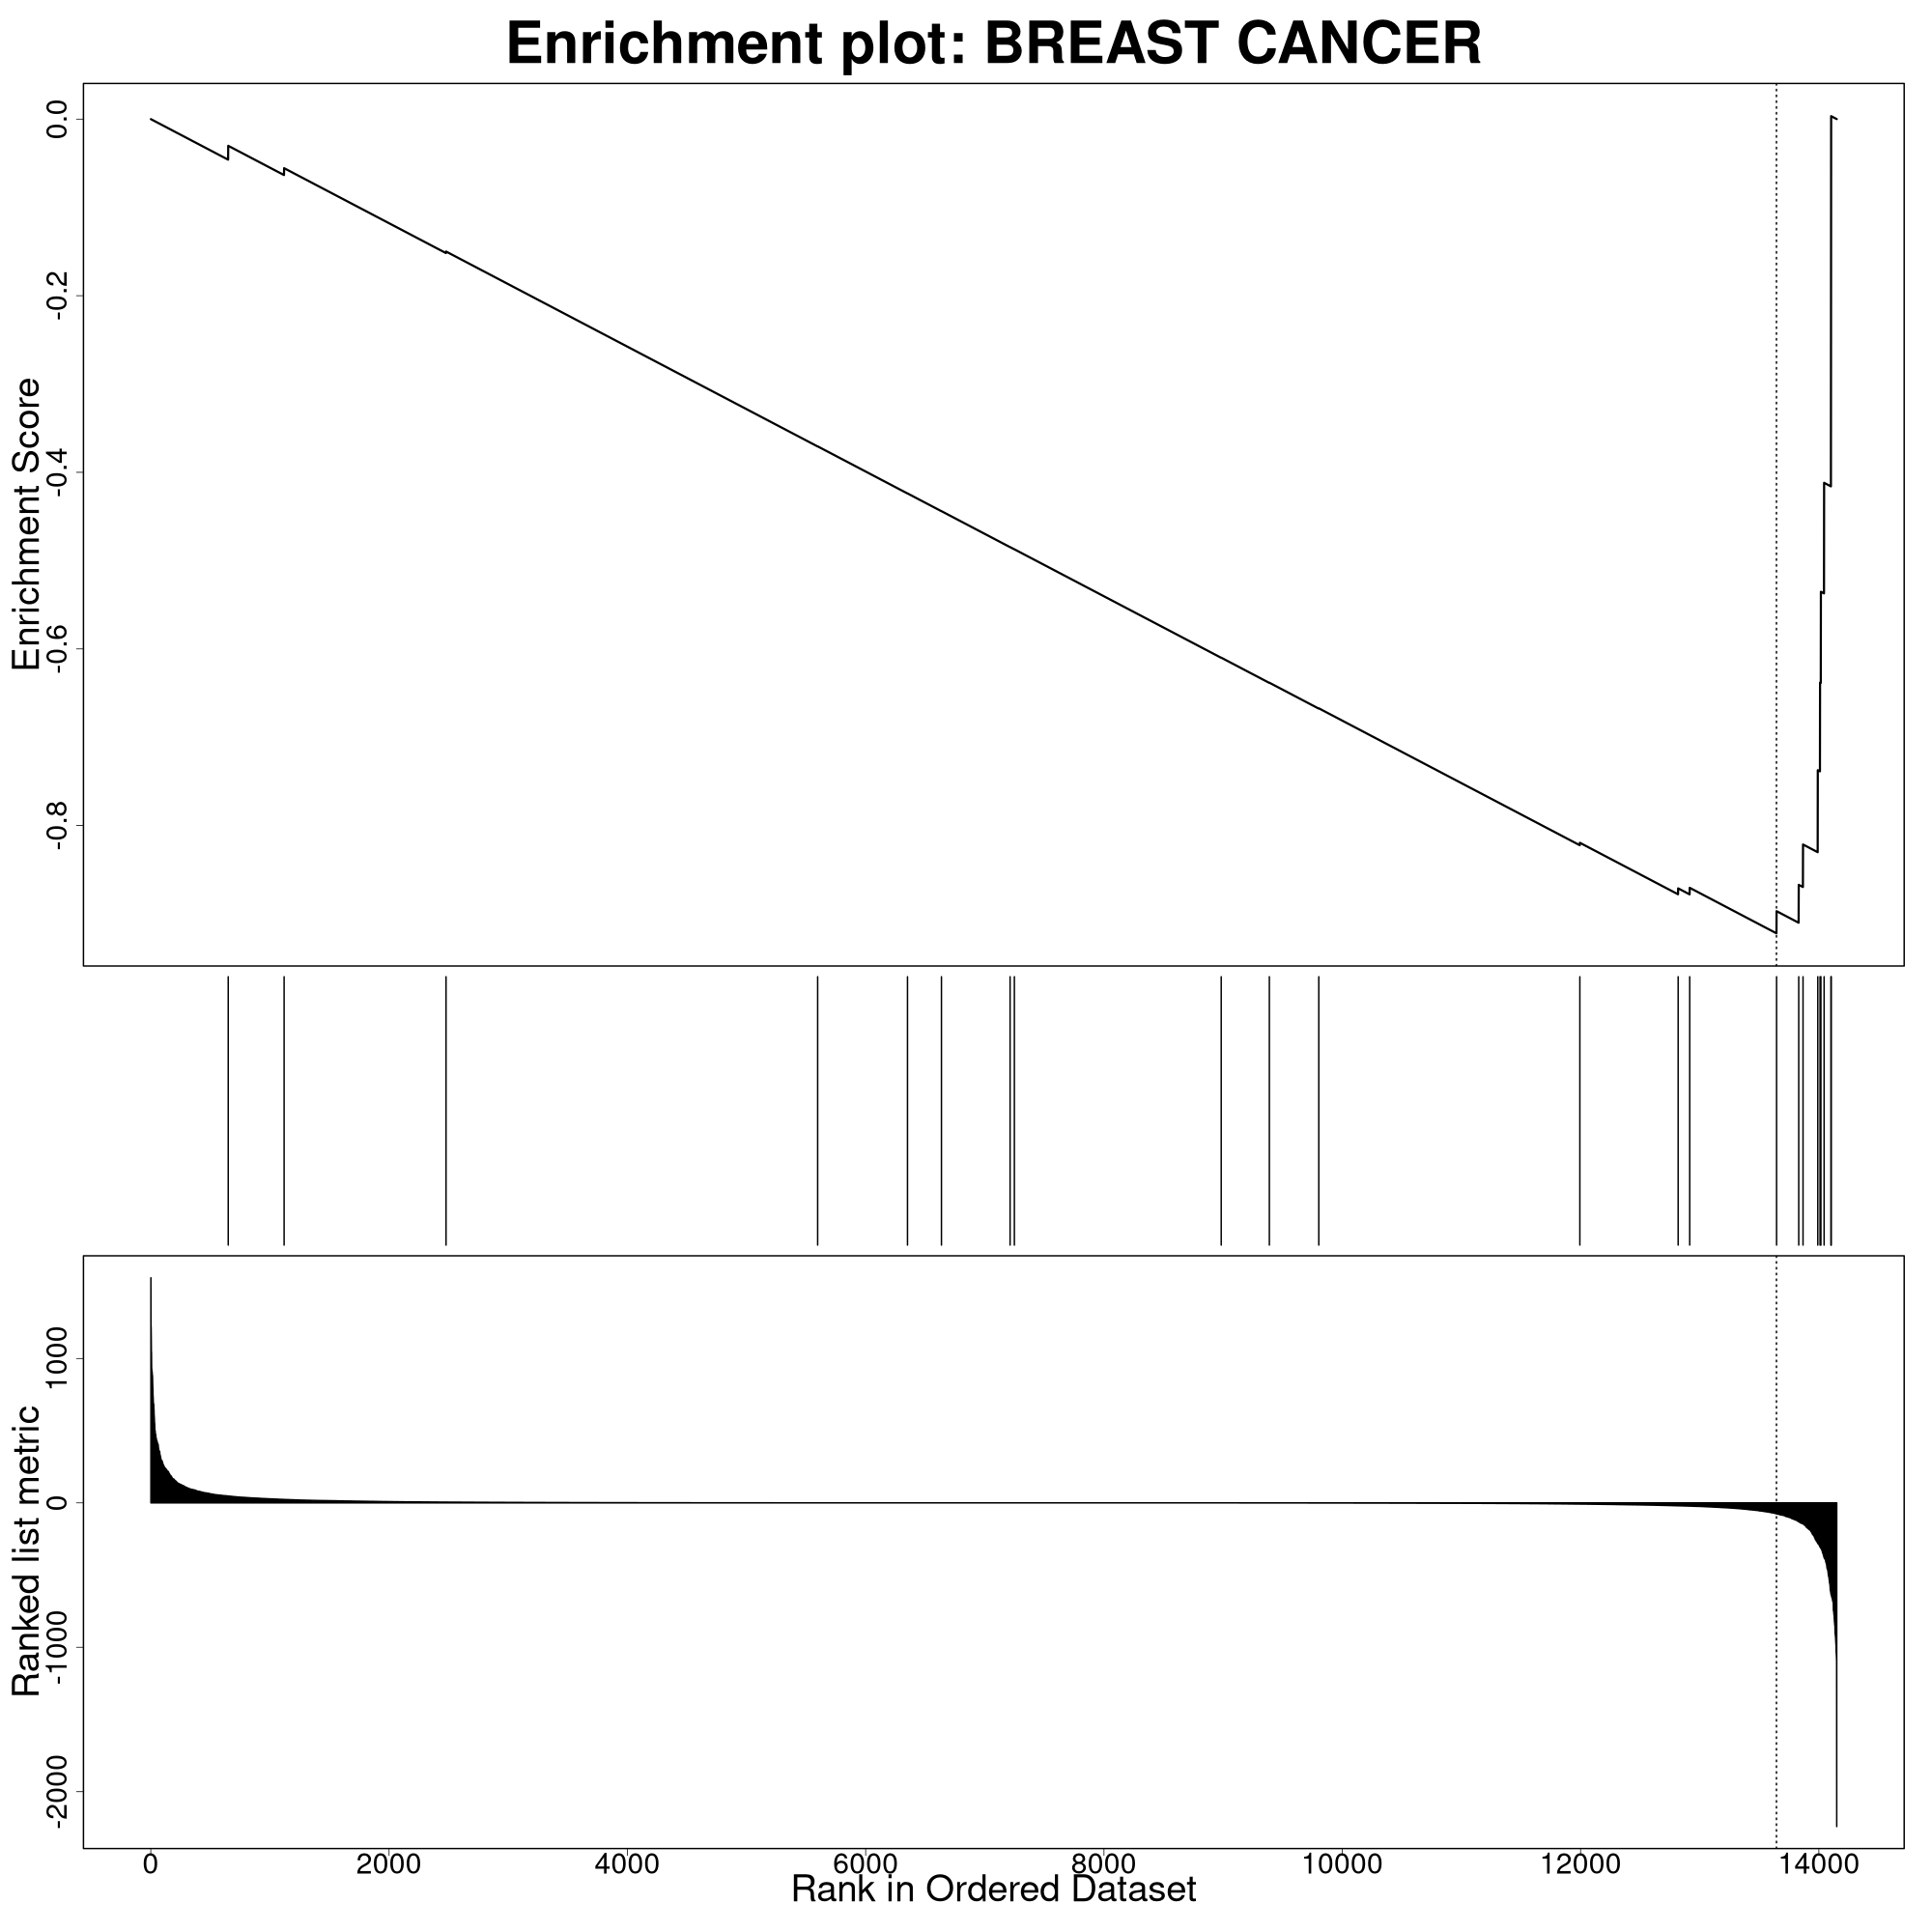

In [84]:
Image.open(r'C:\Users\tobij\Downloads\114480.png')

In [3]:
breast_cancer_geneset_omim = pd.read_csv('114480.csv')
breast_cancer_geneset

NameError: name 'breast_cancer_geneset' is not defined